In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import  BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [124]:
#Importação do datasheet do exercício
df_all = pd.read_csv('data.csv')

#Primeiro contato com datasheet, analisando o head, medias, desvios, max e mins.
df_all.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [171]:

#Datasheet só com as MEANS e Diagnostics
df = df_all.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]] 
df[df.values == 0]

#Foram evidenciados 78 casos com df.concavity_mean e df.concave points_mean com 0.00, prosseguimos as aferições assumindo que os valores são 0.0 mesmo e não se trata de dados faltantes.


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,0.07818
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,0.07818
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,0.06422
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,0.06422
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,0.05975
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,0.05975
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,0.06724
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,0.06724
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,0.06447
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,0.06447


Text(0.5,1,'Fractal Dimension')

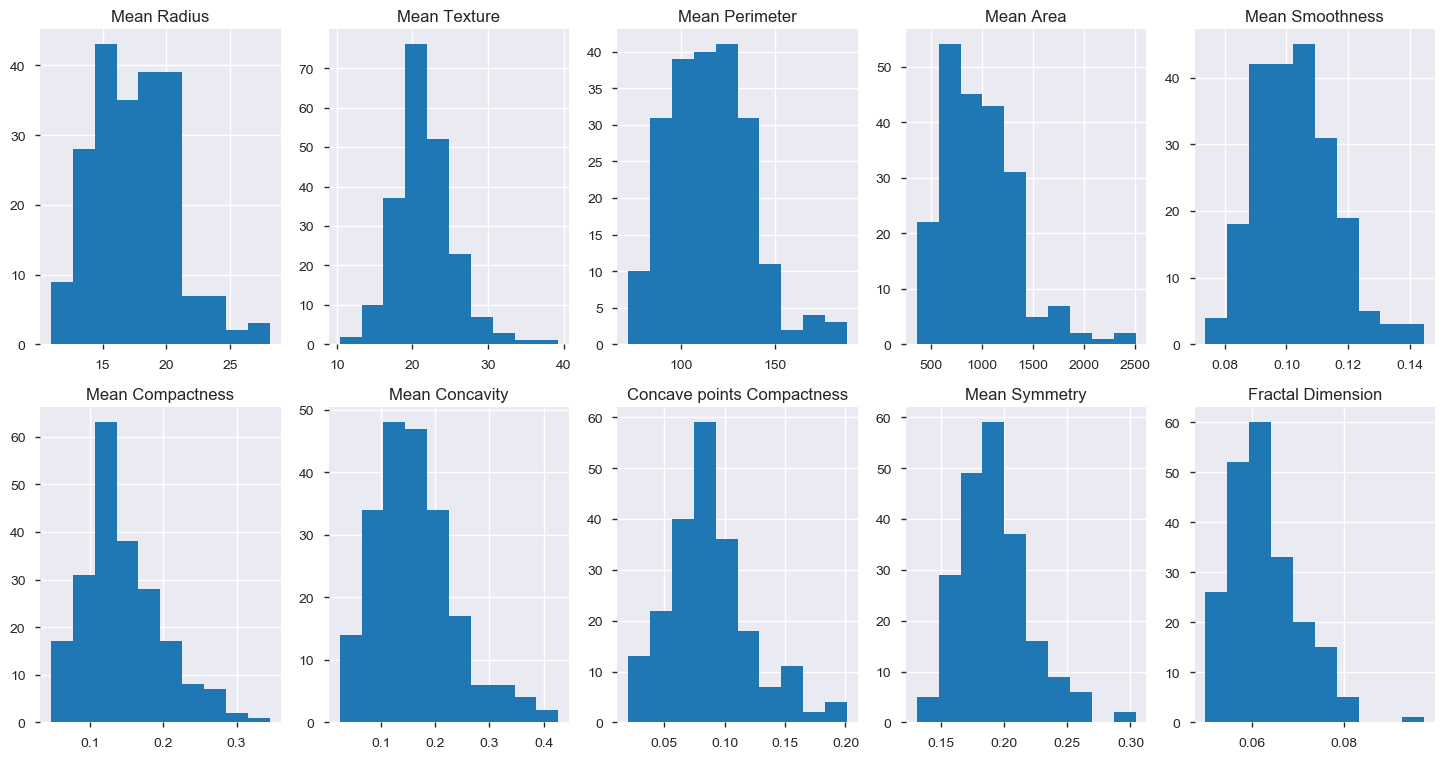

In [126]:
#Aprofundando os entendimentos dos malignos, iniciando por análise exploratória plotando todos os histogramas das 10 vars.
dfM = df[df.diagnosis == 'M']

plt.figure(figsize=[18,9])
plt.subplot(2,5,1)
plt.hist(dfM.radius_mean)
plt.title('Mean Radius')

plt.subplot(2,5,2)
plt.hist(dfM.texture_mean)
plt.title('Mean Texture')

plt.subplot(2,5,3)
plt.hist(dfM.perimeter_mean)
plt.title('Mean Perimeter')

plt.subplot(2,5,4)
plt.hist(dfM.area_mean)
plt.title('Mean Area')

plt.subplot(2,5,5)
plt.hist(dfM.smoothness_mean)
plt.title('Mean Smoothness')

plt.subplot(2,5,6)
plt.hist(dfM.compactness_mean)
plt.title('Mean Compactness')

plt.subplot(2,5,7)
plt.hist(dfM.concavity_mean)
plt.title('Mean Concavity')

plt.subplot(2,5,8)
plt.hist(dfM['concave points_mean'])
plt.title('Concave points Compactness')

plt.subplot(2,5,9)
plt.hist(dfM.symmetry_mean)
plt.title('Mean Symmetry')

plt.subplot(2,5,10)
plt.hist(dfM.fractal_dimension_mean)
plt.title('Fractal Dimension')


Text(0.5,1,'Fractal Dimension')

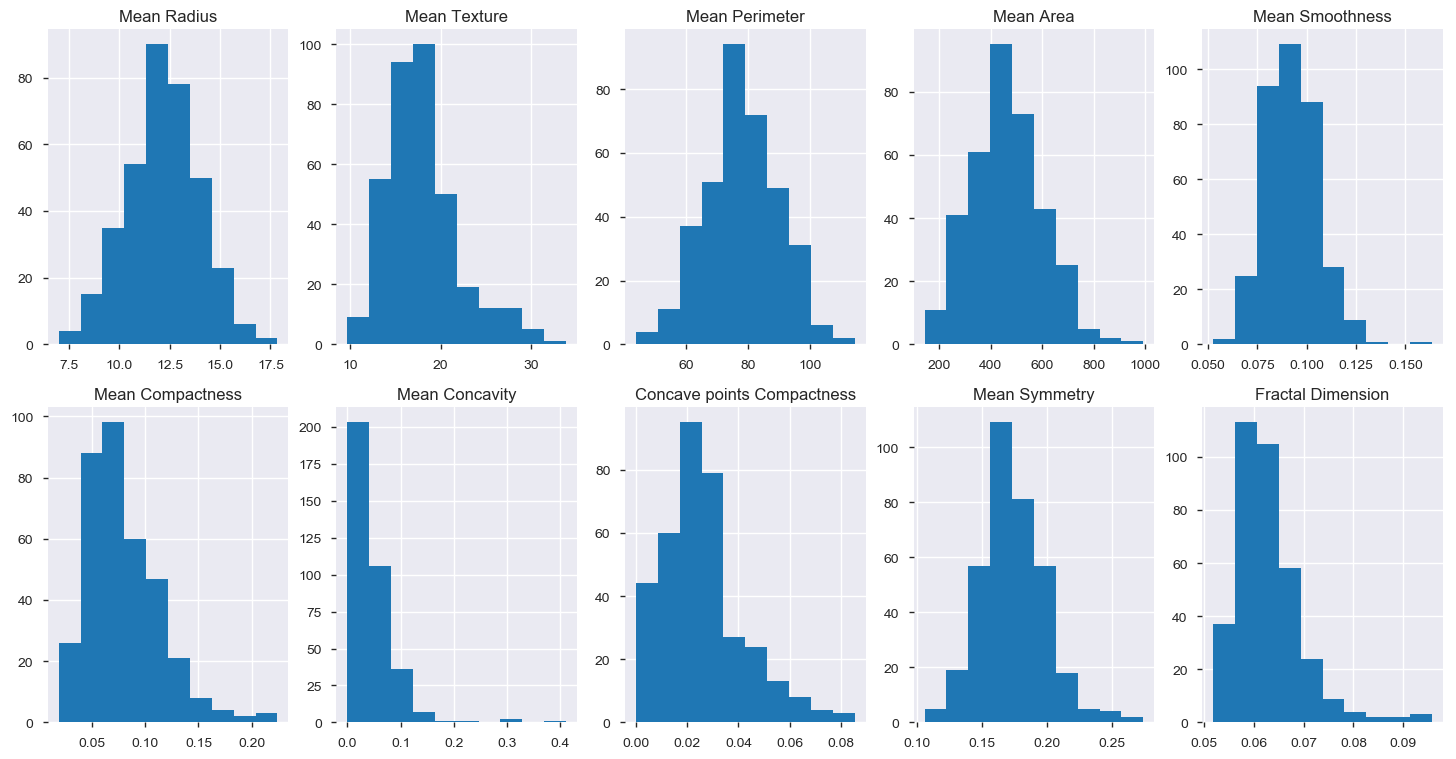

In [127]:
#Aprofundando os entendimentos dos benígnos, iniciando por análise exploratória plotando todos os histogramas das 10 vars.
dfB = df[df.diagnosis == 'B']

plt.figure(figsize=[18,9])
plt.subplot(2,5,1)
plt.hist(dfB.radius_mean)
plt.title('Mean Radius')

plt.subplot(2,5,2)
plt.hist(dfB.texture_mean)
plt.title('Mean Texture')

plt.subplot(2,5,3)
plt.hist(dfB.perimeter_mean)
plt.title('Mean Perimeter')

plt.subplot(2,5,4)
plt.hist(dfB.area_mean)
plt.title('Mean Area')

plt.subplot(2,5,5)
plt.hist(dfB.smoothness_mean)
plt.title('Mean Smoothness')

plt.subplot(2,5,6)
plt.hist(dfB.compactness_mean)
plt.title('Mean Compactness')

plt.subplot(2,5,7)
plt.hist(dfB.concavity_mean)
plt.title('Mean Concavity')

plt.subplot(2,5,8)
plt.hist(dfB['concave points_mean'])
plt.title('Concave points Compactness')

plt.subplot(2,5,9)
plt.hist(dfB.symmetry_mean)
plt.title('Mean Symmetry')

plt.subplot(2,5,10)
plt.hist(dfB.fractal_dimension_mean)
plt.title('Fractal Dimension')


In [128]:
# Avaliando os histogramas consegui compreender que há variáveis com mais impacto na categorização de 'B' ou 'M' 
# É possível entender por meio de suas frequencias e disparidade em cada caso. 
# Variáveis excluídas: Com base na redundância de aparições tanto no 'B' quanto no 'M', por exemplo:
#
# Temos @MeanConcavity com +300f entre [0.0:0.1] como 'B' e em 'M' temos cerca 150f nesse range, tendo 'B' quanto 'M' no range de [0.1:0.3].
# Usando o critério a cima foi cortado algumas variáveis que apresentam menos relação com o resultado.
# Do mesmo modo temos @MeanSymmetry com um range grande de frequência tanto no 'B' quanto no 'M'
#
# Diferente do @ConcavePointsCompactness, onde temos um range decrescente de 'B' [0.0:0.08] e 'M' [~0.02:0.2], ou seja, 
# temos um grande número de +0.08 caracterizado como 'M' logo utilizaremos essa variável para as predições acreditando ser um bom splitpoint. 
#
# Variáveis escolhidas para aprofundamento: @MeanRadius - @ConcavePointsCompactness - @MeanPerimeter - @MeanArea


In [129]:
df.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

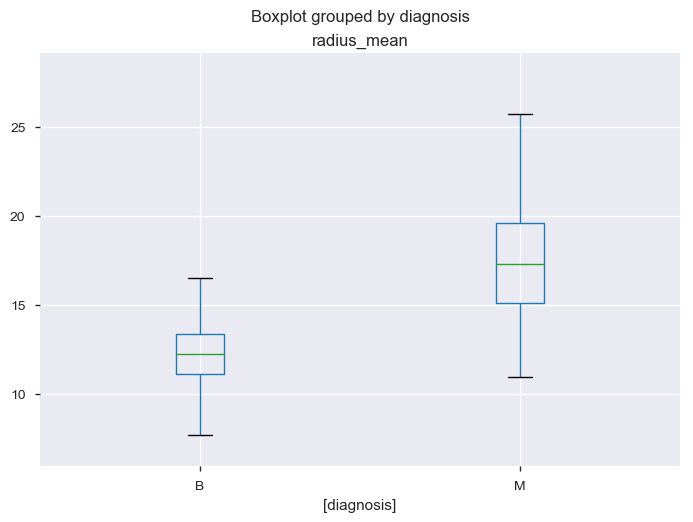

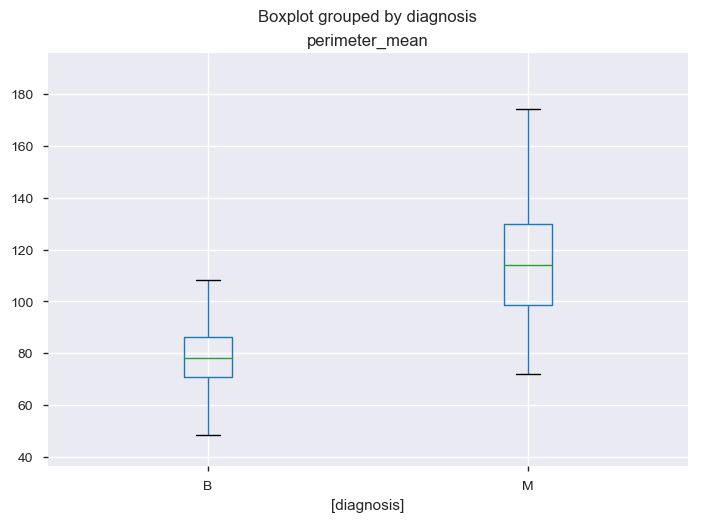

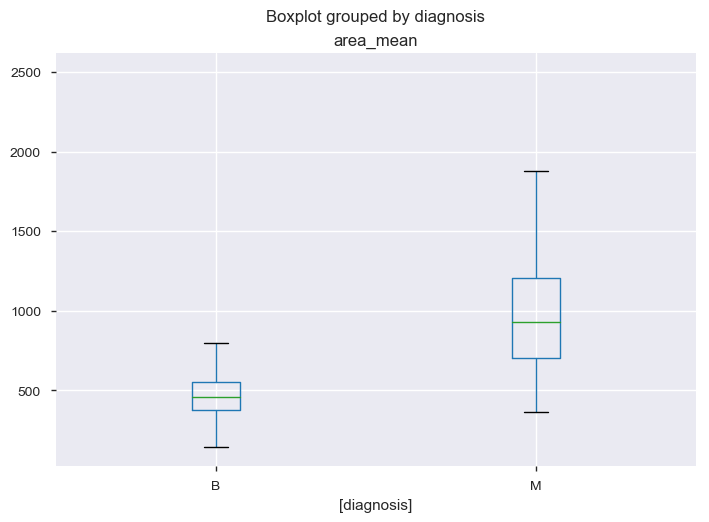

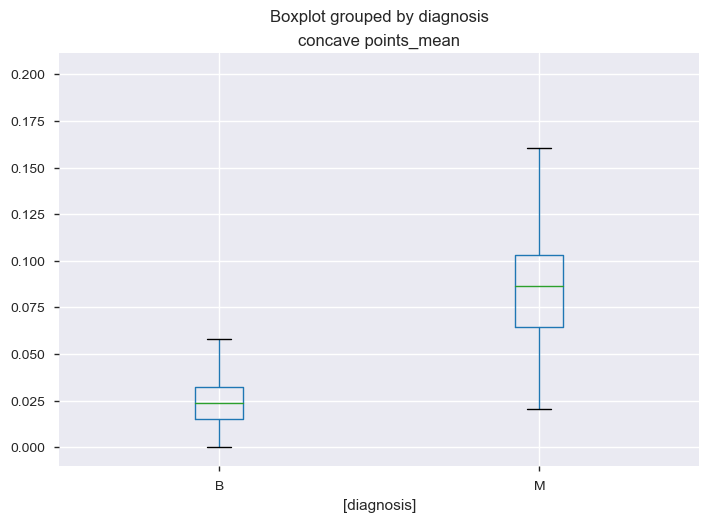

In [130]:
# Variáveis escolhidas manualmente para aprofundamento: @MeanRadius - @ConcavePointsCompactness - @MeanPerimeter - @MeanArea

df.iloc[:,[0,1]].boxplot(by='diagnosis')
df.iloc[:,[0,3]].boxplot(by='diagnosis')
df.iloc[:,[0,4]].boxplot(by='diagnosis')
df.iloc[:,[0,8]].boxplot(by='diagnosis')

In [10]:
# Há um número considerável de outliers, porém como são casos de doenças comprovados e tratando-se de doenças, 
# mesmo que sejam anomalias distintas devem ser levadas em consideração para evitar Falso/(Positivo-Negativo). 

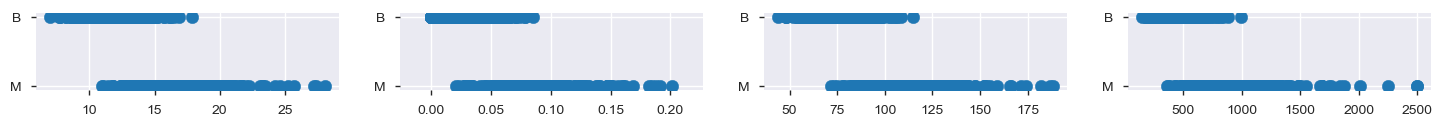

In [131]:
plt.figure(figsize=[18,1])

plt.subplot(1,4,1)
plt.scatter(df.radius_mean,df.diagnosis, s = 80)

plt.subplot(1,4,2)
plt.scatter(df['concave points_mean'],df.diagnosis, s = 80)

plt.subplot(1,4,3)
plt.scatter(df.perimeter_mean,df.diagnosis, s = 80)

plt.subplot(1,4,4)
plt.scatter(df.area_mean,df.diagnosis, s = 80)

In [133]:
#Preparando o Datasheet para montar o X excluindo apenas o Diagnostics que será nosso Y ao longo do projeto
dfAll = df.iloc[:,[1,2,3,4,5,6,7,8,9,10]].copy()

# As 4 variáveis escolhidas apresentam movimentos matemáticos muitos parecidos, ou seja, não são variáveis tão determinante.
# Evidenciada a insatisfação já na etapa exploratória em relação às variáveis escolhidas, utilizamos o Profiling paraentender as 
# corelação entre as variáveis, buscando aumentar a accuracy por meio de variáveis mais determinantes

In [172]:
!pip install pandas-profiling

import pandas as pd
import pandas_profiling
import numpy as np

pandas_profiling.ProfileReport(dfAll)

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Number of variables,10
Number of observations,569
Total Missing (%),0.0%
Total size in memory,44.5 KiB
Average record size in memory,80.1 B
Numeric,7
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [179]:
# Criando nossos Labels(Y), tivemos que binarizar o 'B' e 'M' para plotagens posteriores.
dfTarget = df.copy()
dfTarget = dfTarget.iloc[:,0]
dfTarget[dfTarget=='M'] = 1
dfTarget[dfTarget=='B'] = 0

st = StandardScaler()
pca = PCA(n_components=2)

In [180]:
# Entendimento da BigPicture, após passar para escala de 0,1 (StandardScaler), aplicamos o PCA para plotagens com 2 componetes e 
# vizualição por meio de dispersão, tentando aplicar o Kmeans para tentar descobrir alguma comportamento clusterizado das variáveis.
st = StandardScaler()
pca = PCA(n_components=2)

st.fit(dfAll)
dfAll = st.transform(dfAll)

pca.fit(dfAll)
dfDataPCA = pca.transform(dfAll)

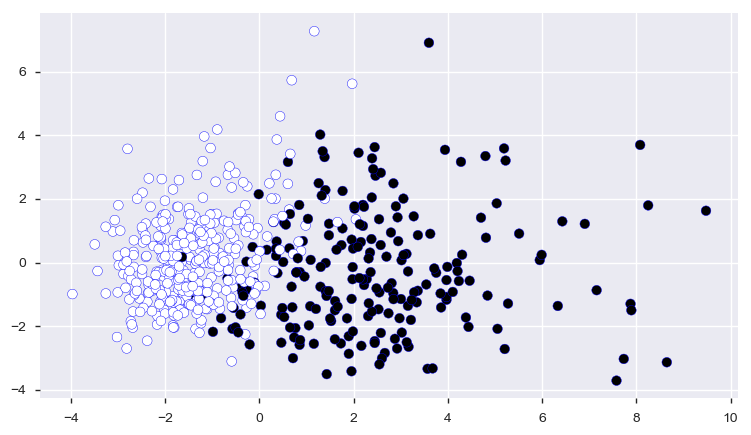

In [182]:
plt.figure(figsize=[9,5])
plt.scatter(dfDataPCA[:,0],dfDataPCA[:,1], c=dfTarget, edgecolors='b')

# Foi possível observar uma divisão clara na dispersão do 'B' e 'M', porém ainda há uma linha de confusão que intercciona vários casos, 
# sendo este o principal motivo de perda de acurácia na predição.


In [183]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dfData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [184]:
preds_kmeans = kmeans.predict(dfData)

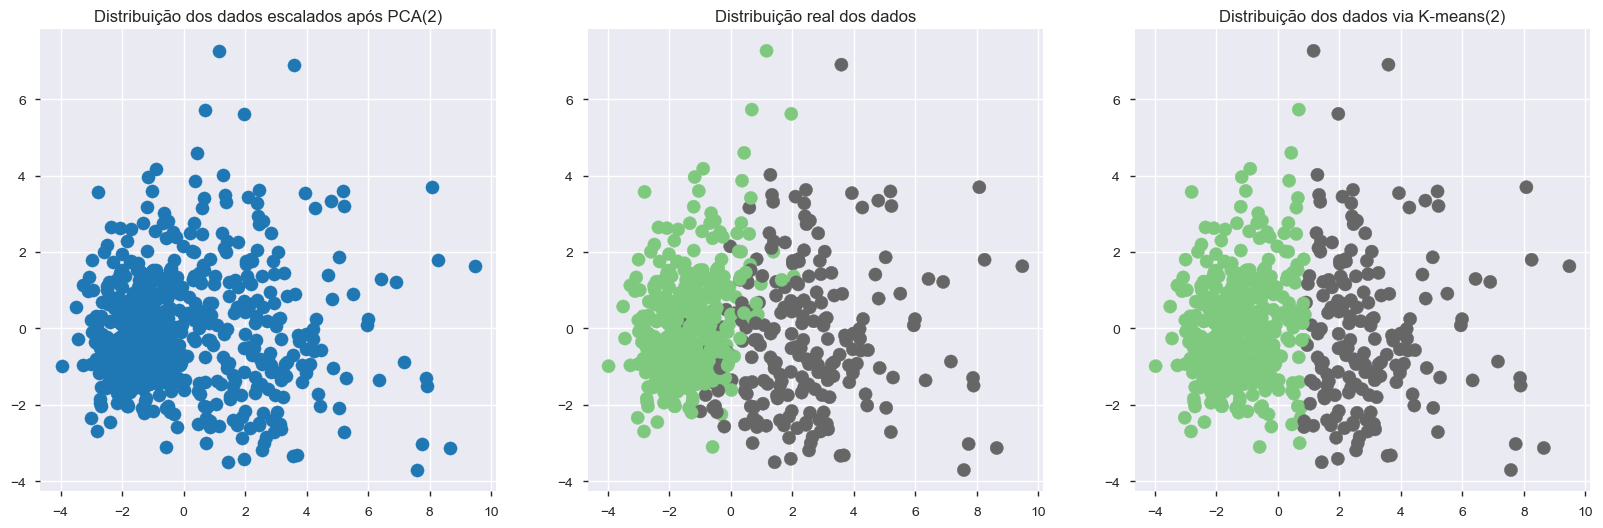

In [186]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
plt.scatter(dfDataPCA[:,0], dfDataPCA[:,1], s = 90)
plt.title("Distribuição dos dados escalados após PCA(2)")

plt.subplot(1,3,2)
plt.scatter(dfDataPCA[:,0], dfDataPCA[:,1], c = dfTarget, cmap = plt.cm.Accent, s = 90)
plt.title("Distribuição real dos dados")

plt.subplot(1,3,3)
plt.scatter(dfDataPCA[:,0], dfDataPCA[:,1], c = preds_kmeans, cmap = plt.cm.Accent, s= 90)
plt.title("Distribuição dos dados via K-means(2)")

plt.show()

# A clusterização está muito generalizada, com baixo índice visual de precisão como podemos ver no 3º quadro

In [191]:
from sklearn.neighbors import KNeighborsClassifier

# Normalização e preprocessamento dos dados [Somente nas MEANS - dfAll]
st.fit(dfAll)
dfAllSS = st.transform(dfAll)

#aplicando PCA em cima dos datos Standartizados (Porém não foi utilizado, pois decaiu muito o rendimento dos testes)
pca = PCA(n_components=2)
pca.fit(dfAllSS)
dfAllSSPCA = pca.transform(dfAllSS)

Y = dfTarget.astype('int')
X = dfAllSS

In [192]:
# Machine Learning Algoritmos
models = []
models.append(('KNeighborsClassifier......:', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier....:', DecisionTreeClassifier()))
models.append(('RandomForestClassifier....:', RandomForestClassifier()))
models.append(('MLPClassifier.............:', MLPClassifier()))
models.append(('SVM.......................:', SVC()))

In [193]:
#Parâmetros para todos os Machine Learning Models
seed = 7
scoring = 'accuracy'

#Avaliação para cada modelo escolhido
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNeighborsClassifier......: 0.938793 (0.040711)
DecisionTreeClassifier....: 0.921305 (0.061561)
RandomForestClassifier....: 0.942611 (0.055778)


C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

MLPClassifier.............: 0.950985 (0.043263)
SVM.......................: 0.940579 (0.063118)


C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [195]:
# Cosidero boas acurácias que os algoritmos conseguirem por meio das 10 means, porém tratando-se de quase 600 amostragens e 
# situações determinísticas surgiu a ideia de aprofundar-se no nosso melhor resultado MLPClassifier

#KNeighborsClassifier......: 0.938793 (0.040711)
#DecisionTreeClassifier....: 0.921305 (0.061561)
#RandomForestClassifier....: 0.942611 (0.055778)
#MLPClassifier.............: 0.950985 (0.043263) <-------- Melhor resultado! Resolvemos ampliar para 30Vars (Means/Worst/Se)
#SVM.......................: 0.940579 (0.063118)

In [198]:
# Utilizando o GRIDSEARCHCV para procurar os melhores hiperparâmetros considerando os melhores score de cara pacote passado:
#
# parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0, 10]} 
# parameters = {'n_neighbors': [1, 5, 10, 20, 50]} 
# parameters = {'n_estimators': [10], 'max_depth': [100] }
# parameters = {'hidden_layer_sizes': [(5,),(10,),(30,),(45,),(50,),(100,),(300,)] }
#
#
# Não entendi porque mas todos caíram cerca de 1% em relação ao teste anterior definidos com 20 Folds e valores default.

In [199]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0, 10]} 

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, Y)

msg = "Melhor parametro --> %s \nMelhor Score     --> %s" % (clf.best_params_, clf.best_score_)

print(msg)

Melhor parametro --> {'C': 10, 'kernel': 'rbf'} 
Melhor Score     --> 0.9402460456942003


In [197]:
parameters = {'n_neighbors': [1, 5, 10, 20, 50]} 

kn = KNeighborsClassifier()
clf = GridSearchCV(kn, parameters)
clf.fit(X, Y)

msg = "Melhor parametro --> %s \nMelhor Score     --> %s" % (clf.best_params_, clf.best_score_)

print(msg)
    

Melhor parametro --> {'n_neighbors': 5} 
Melhor Score     --> 0.9367311072056239


In [151]:
parameters = {'n_estimators': [10], 'max_depth': [100] }

rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X, Y)

msg = "Melhor parametro --> %s \nMelhor Score     --> %s" % (clf.best_params_, clf.best_score_)

print(msg)

Melhor parametro --> {'max_depth': 100, 'n_estimators': 10} 
Melhor Score     --> 0.9367311072056239


In [152]:
parameters = {'hidden_layer_sizes': [(5,),(10,),(30,),(45,),(50,),(100,),(300,)] }

mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters)
clf.fit(X, Y)

msg = "Melhor parametro --> %s \nMelhor Score     --> %s" % (clf.best_params_, clf.best_score_)

print(msg)



C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Melhor parametro --> {'hidden_layer_sizes': (100,)} 
Melhor Score     --> 0.9420035149384886


C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [200]:
# Não satisfeito, procuramos aumentar a accuracy e precision investindo na nossa melhor estratégia MLPClassifier

# Todo o datasheet menos o "id" e "Unnamed: 32" que são inúteis.
X = df_all[df_all.columns[2:-1]]


In [202]:
#Fatiamos em 35% o size de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    random_state=42,
    test_size=0.32
)

X_train_scaler = st.fit_transform(X_train)
X_test_scaler = st.transform(X_test)

In [206]:
# AJUSTANDO OS PARÂMETROS DO ALGORITMO DO MLPCLASS ADQUIRIDOS APÓS HORAS DE PROCESSAMENTO DO PERCEPTRON APICAMOS NO DATASHEET
#
# Estrutura do Perceptron (ranges e pipelines):
#
#  @mlp_param_grid = [
#     {
#         'preprocess': [Normalizer(), MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()],
#         'classification__activation': ['identity', 'logistic', 'tanh', 'relu'],
#         'classification__solver': ['lbfgs', 'sgd', 'adam'],
#         'classification__random_state': 42,
#         'classification__max_iter': range(1000, 10000, 1000),
#         'classification__alpha': [1e-4, 1e-3, 0.01, 0.1, 1],
#     }
#  ]
#


# O MODELO FINAL
mlp = MLPClassifier(
    max_iter=1000,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
)

mlp.fit(X_train_scaler, y_train)

mlp_predict = mlp.predict(X_test_scaler)
mlp_predict_proba = mlp.predict_proba(X_test_scaler)[:, 1]

print('MLP ACURÁCIA: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP PRBABILIDADE (ROC CURVE): {:.2f}%'.format(roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP CLASSFICAÇÃO GERAL:\n\n', classification_report(y_test, mlp_predict))
print('MLP TOTAL TREINO: {:.2f}%'.format(mlp.score(X_train_scaler, y_train) * 100))
print('MLP TOTAL TESTE: {:.2f}%'.format(mlp.score(X_test_scaler, y_test) * 100))

MLP ACURÁCIA: 99.45%
MLP PRBABILIDADE (ROC CURVE): 99.86%
MLP CLASSFICAÇÃO GERAL:

              precision    recall  f1-score   support

          0       0.99      1.00      1.00       119
          1       1.00      0.98      0.99        64

avg / total       0.99      0.99      0.99       183

MLP TOTAL TREINO: 98.45%
MLP TOTAL TESTE: 99.45%


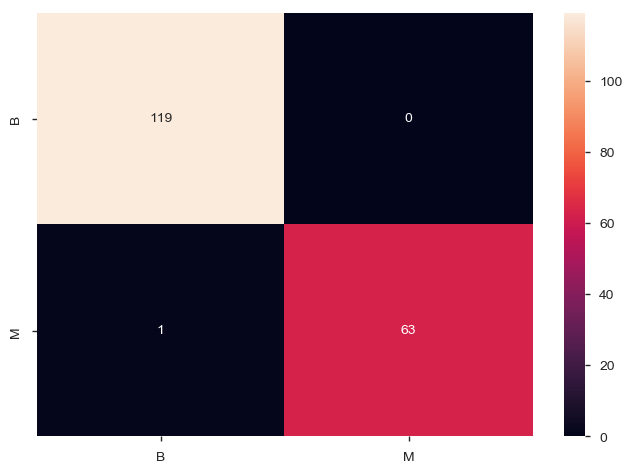

In [204]:
# Com a matriz de confusão é possível perceber que só tivemos 1 Falso-Positivo, 
# porém vale ressaltar que o algoritmo acertou TODOS os 'M'.

outcome_labels = sorted(df_all.diagnosis.unique())

sns.heatmap(
    confusion_matrix(y_test, mlp_predict),
    annot=True,
    fmt="d",
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

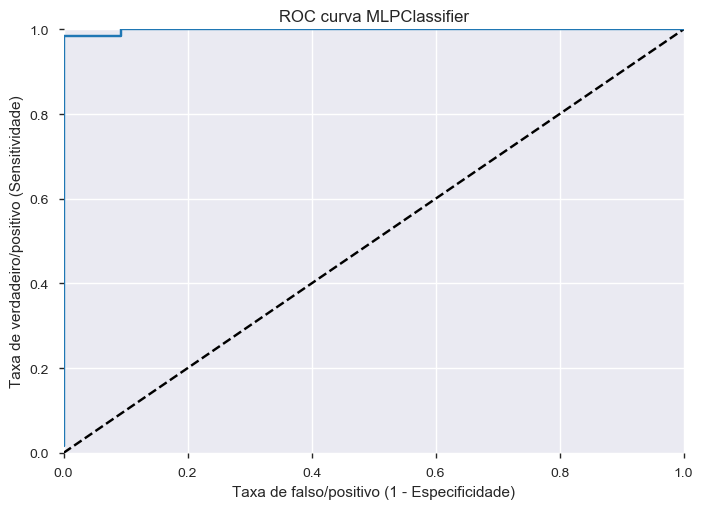

In [205]:
#Outro modo interessante de tirar conclusões sobre a predição é a "Curva ROC".
fpr, tpr, thresholds = roc_curve(y_test, mlp_predict_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curva MLPClassifier')
plt.xlabel('Taxa de falso/positivo (1 - Especificidade)')
plt.ylabel('Taxa de verdadeiro/positivo (Sensitividade)')
plt.grid(True)